#Ejercicio Tensores

Dentro del conjunto de datos, seleccióne la esquina inferior que contenga $14\times14$ píxeles en cada una de las imágenes y visualice una de ellas. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


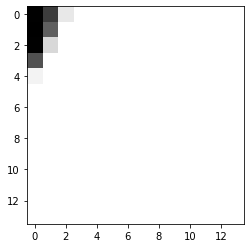

In [ ]:
my_slice_corner = train_images[:, 14:, 14:]

digit = my_slice_corner[3]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#Ejercicio Funciones

Escriba un código en Python que devuelva el máximo valor de un vector.

In [ ]:
def max_array1D(arr): 
  
    max = arr[0] 

    for i in range(1, arr.shape[0]): 
        if arr[i] > max: 
            max = arr[i] 
    return max

In [ ]:
lista1=np.array([1,2,3,4,5])

In [ ]:
max_array1D(lista1)

5

#Ejercicio Clases

Creen una clase `Point` en coordenadas cartesianas, que se su constructor inicialice el objeto a un punto con unas coordenadas dadas. Además, la clase debe contener dos métodos:

* `translate()`, que reciba como argumentos dos valores arbitrarios $(x,y)$.
* `__str__(self)`: que imprima el punto en precisión de coma flotante.

In [ ]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def translate(self, dx, dy):
    self.x +=dx
    self.y +=dy
  def __str__(self):
    return("Point at [%f, %f]" % (self.x, self.y))

In [ ]:
puntos = Point(20.3, 50.8)

In [ ]:
puntos.translate(5, 5)
puntos.y

55.8

In [ ]:
str(puntos)

'Point at [25.300000, 55.800000]'

In [ ]:
from tensorflow import keras
from keras.datasets import fashion_mnist

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np

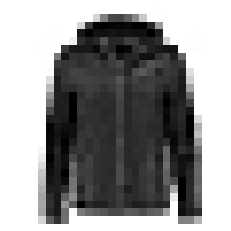

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off');

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape=[28, 28]));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(100, activation="relu"));
model.add(keras.layers.Dense(10, activation="softmax"));

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=["accuracy"])

In [ ]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7130 - accuracy: 0.7668 - val_loss: 0.4938 - val_accuracy: 0.8342
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4834 - accuracy: 0.8303 - val_loss: 0.4823 - val_accuracy: 0.8264
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4396 - accuracy: 0.8448 - val_loss: 0.4327 - val_accuracy: 0.8502
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4121 - accuracy: 0.8536 - val_loss: 0.4120 - val_accuracy: 0.8524
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3931 - accuracy: 0.8616 - val_loss: 0.3938 - val_accuracy: 0.8598
Epoch 6/20
1395/1719 [=======================>......] - ETA: 1s - loss: 0.3794 - accuracy: 0.8651

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(history.history)
df.head()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred

## model.predict(X_test) > 0.5).astype("int32")--->> solo aproxima a 1 las prob mayores a 0.5

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
y_pred2 = np.argmax(model.predict(X_new), axis=-1)
y_pred2

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred2]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

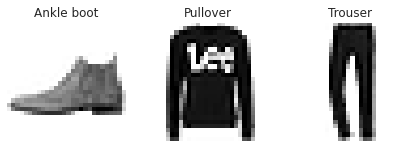

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

#Ejercicio con imagenes

Suba una imagen propia y haga una predicción usando el modelo entrenado

In [ ]:
from google.colab import files
uploaded = files.upload()
#Usando OpenCV
#import cv2
#data = cv2.imread("img.jpg",cv2.IMREAD_GRAYSCALE)
#data = cv2.resize(data,(28,28))
#Predecir
#y_pred = model.predict_classes(X_new.reshape(1,28,28))


Saving Captura.PNG to Captura.PNG


In [ ]:
#Usando OpenCV
import cv2
data = cv2.imread("Captura.PNG",cv2.IMREAD_GRAYSCALE)
#data = cv2.resize(data,(28,28))
#Predecir
#y_pred = model.predict_classes(X_new.reshape(1,28,28))

In [ ]:
data = cv2.resize(data,(28,28))
#Predecir
#y_pred = model.predict_classes(X_new.reshape(1,28,28))

In [ ]:
y_pred = (model.predict(data.reshape(1,28,28)) > 0.5).astype("int32")
y_pred
#y_pred = model.predict_classes(X_new)
#y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [ ]:
y_pred = np.argmax(model.predict(data.reshape(1,28,28)), axis=-1)
y_pred

array([8])

In [ ]:
np.array(class_names)[y_pred2]

array(['Ankle boot'], dtype='<U11')

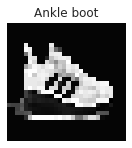

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(data.reshape(1,28,28)):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)